# Week 2: probability theory & random variables

Last week we had our first encounter with Monte Carlo simulations: the various incarnations of the pebble game used random numbers to estimate the ratio of the areas of a circle and a square. We have also witnessed that several factors affect the accuracy of the estimate: more samples means higher accuracy, while having independent samples like in the direct-sampling Monte Carlo method is better than the correlated samples of the Markov-chain approach. In order to reason properly about the simple examples and to be well equipped for the more involved problems we will encounter, it is essential to agree upon the probability theory background. This will be the focus of this week's lecture.

## Elements of probability theory

### Probability spaces, events, independence

The arena of probability theory is a **probability space** $(\Omega,\mathbb{P})$. Here $\Omega$ is the **sample space**, meaning the set of possible outcomes of an experiment, and $\mathbb{P}$ is a **probability measure** on $\Omega$. A subset $A\subset\Omega$ is called an **event** and to any event $\mathbb{P}$ associates a real number $\mathbb{P}(A) \in [0,1]$ telling us the probability of this event, i.e. the probability that the outcome of an experiment is in $A$. In particular it is required to satisfy $ \mathbb{P}(\Omega) = 1$, $\mathbb{P}(\emptyset) = 0$, and for any sequence of disjoint events $A_1,A_2,\ldots$ (meaning $A_i \cap A_j = \emptyset$ whenever $i\neq j$),
$$\mathbb{P}( A_1 \cup A_2 \cup \cdots) =\mathbb{P}( A_1) + \mathbb{P}(A_2) + \cdots. \tag{1}$$
In words: the chance of any of a set of mutually exclusive events to happen is the sum of the chances of the individual events.

**Example (direct-sampling pebble game)**: <font color='darkblue'>The sample space of a single throw in the direct-sampling pebble game is the square $\Omega = (-1,1)^2$ and the probability measure $\mathbb{P}$ is the measure on $\Omega$ determined by the probability density $p(\mathbf{x}) = 1/4$, i.e. for any subset $A \subset \Omega$ we had $\mathbb{P}(A) = \int_A p(\mathbf{x}) \mathrm{d}\mathbf{x}$. We were particularly interested in the event $\text{hit} = \{ \mathbf{x} \in (-1,1)^2 : \mathbf{x}\cdot\mathbf{x} < 1\}$ and we convinced ourselves that $\mathbb{P}(\text{hit}) = \pi/4$.</font>

**Example (die roll)**: <font color='darkblue'>When rolling a $6$-sided die, the sample space is $\Omega = \{1,2,\ldots,6\}$ and the probability measure is the one that satisfies $\mathbb{P}(\{i\}) = 1/6$ for any $i \in \Omega$. An example of an event is $\text{even} = \{2,4,6\} \subset \Omega$ which by formula (1) has probability $\mathbb{P}(\text{even}) = \mathbb{P}(\{1\}) + \mathbb{P}(\{2\}) + \mathbb{P}(\{3\}) = 1/2$. </font>

Several properties of a probability space follow directly from the definition. If $A$ and $B$ are two events then

$$ 
\mathbb{P}(\Omega \setminus A) = 1- \mathbb{P}(A)\qquad \text{"probability of $A$ not happening"}, \\
\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A \cap B) \qquad \text{"probability of $A$ or $B$"}, \\
\mathbb{P}(A \setminus B) = \mathbb{P}(A) - \mathbb{P}(A \cap B) \qquad \text{"probability of $A$ and not $B$"}, \\
A \subset B\quad \implies\quad \mathbb{P}(A) \leq \mathbb{P}(B) \qquad\text{"if $A$ implies $B$ then $B$ cannot have smaller probability"}.
$$

Side note: If we want to be [mathematically rigorous](https://en.wikipedia.org/wiki/Probability_space) we should be specifying what subsets $A \subset \Omega$ constitute proper events (the so-called $\sigma$-algebra), because some subsets of a continuous space can be just too wild to assign a probability to. We will not delve into these measure-theoretic issues as they will play little role in the probability spaces we consider.

An important concept in probability is that of **conditional probabilities**. If $A$ and $B$ are events such that $B$ happens with non-zero probability $\mathbb{P}(B) > 0$ then the **conditional probability** of $A$ given $B$ is $$
\mathbb{P}( A | B ) := \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}.
$$
You may check that $\mathbb{P}(\cdot|B)$ is a proper probability measure on $\Omega$, which tells us what the probability of outcomes of an experiment is if you already know that event $B$ happens.

Note that in general this measure is different from $\mathbb{P}$ itself, i.e. typically $\mathbb{P}(A) \neq \mathbb{P}( A | B)$, meaning that knowing that $B$ happens changes the probability of $A$ happening. Sometimes this is not the case: events $A$ and $B$ are said to be **independent** if 
$$
\mathbb{P}(A) = \mathbb{P}( A | B)\quad \iff \quad \mathbb{P}( A\cap B) = \mathbb{P}(A)\mathbb{P}(B) \quad \iff \quad \mathbb{P}(B) = \mathbb{P}( B | A).
$$

**Example (die roll)**: <font color='darkblue'>The events $\{2,4,6\}$ ("even") and $\{1,2,3,4\}$ ("at most 4") are independent, but $\{1,2,3\}$ ("at most 3") is independent of neither of those.</font>

The notion of independence can be extended to a sequence of events. Events $A_1,A_2,\ldots,A_n$ are **independent** if
$$ \mathbb{P}( \cap_{i\in I} A_i ) = \prod_{i\in I} \mathbb{P}(A_i) \qquad \text{for all subsets }I\subset\{1,2,\ldots,n\}. 
$$

**Example (direct-sampling pebble game)**: <font color='darkblue'>When considering $N$ throws in this game, the sample space is naturally given by $N$-fold copy of the square $\Omega = \big( (-1,1)^2 \big)^N = \{ (\mathbf{x}_1,\ldots,\mathbf{x}_N) \}$. Then the event of a hit in the $k$th trial is given by $\text{hit}_k = \{ (\mathbf{x}_1,\ldots,\mathbf{x}_N) : \mathbf{x}_k\cdot\mathbf{x}_k < 1\}$. The events $\text{hit}_1,\ldots,\text{hit}_N$ are then independent: the probability of a hit in one trial is not affected by knowing the hits or misses in the $N-1$ other trials.</font>


### Random variables

A (real) **random variable** $X$ is a function from the sample space $\Omega$ to the real numbers $\mathbb{R}$. Sometimes one considers also functions into other spaces like $\mathbb{C}$ or $\mathbb{R}^n$, giving rise to complex random variables or random vectors, but for now let us concentrate on real random variables. Sometimes the sample space $\Omega$ is quite complicated (as it contains all details about an experiment) and we would like to limit ourselves to describing the information one gets from just looking at the random variable $X$. In other words we consider the **distribution** of $X$, which is a probability measure on $\mathbb{R}$ given by 

$$\mathbb{P}( X \in B) := \mathbb{P}(\{ x\in \Omega : X(x) \in B\}) \qquad\text{for every (decent) subset } B\subset \mathbb{R}.$$

A convenient way to characterize a distribution is via the **cumulative distribution function (CDF)**

$$ F_X(x) := \mathbb{P}( X \leq x), \qquad x\in\mathbb{R}.$$

It exists for any random variable (discrete or continuous) and satisfies: $F_X(x)$ is non-decreasing and [right-continuous](https://en.wikipedia.org/wiki/Continuous_function#Directional_and_semi-continuity) whenever it jumps; $\lim_{x\to -\infty} F_X(x) = 0$; $\lim_{x\to \infty} F_X=1$. This is really a 1-to-1 characterization: for any such real function there exists a random variable having that CDF. In fact we will see below an explicit way, called the **inversion method**, to construct such a random variable from the CDF.  Two random variables (potentially on different probability spaces) are said to be **identically distributed** if they have the same distribution, or equivalently the same CDF.

### Expectation value

Formally, given a random variable $X$, the **expectation value** or **mean** of $X$ is
$$ \langle X \rangle \equiv \mathbb{E}[ X ] := \int_{\Omega} X \mathrm{d}\mathbb{P}, $$
but making sense of this requires abstract measure and integration theory. Luckily pretty much all random variables we will encounter are either **discrete** of **(absolutely) continuous** in which case the expectation value amounts to a sum or standard calculus integral (see below). In full generality it satisfies the important property of **linearity**: if $X$ and $Y$ are random variables on some probability space and $a,b\in\mathbb{R}$ then

$$\mathbb{E}[a X + b Y] = a\, \mathbb{E}[X] + b \,\mathbb{E}[Y].$$

Note that this holds even when $X$ and $Y$ are highly dependent, making it an extremely powerful property that we will use again and again.
Note also that if $X$ is constant (or deterministic), i.e. $\mathbb{P}(X = x) = 1$ for some $x\in \mathbb{R}$, then $\mathbb{E}[X] = x$.

Another important property holds for independent random variables. The notion of independence of random variables is similar to that of events: random variables $X_1,X_2,\ldots,X_n$ are called **independent** if the distribution of one of the random variables is not affected by knowing any of the values of the other $n-1$ variables. Mathematically this is expressed as
$$ \mathbb{P}( X_1 \in B_1, X_2 \in B_2, \ldots, X_n\in B_n) = \prod_{i=1}^n \mathbb{P}(X_i \in B_i), $$
where the $B_i$ are arbitrary subsets of $\mathbb{R}$.
In this case 
$$
\mathbb{E} \Big[ \prod_{i=1}^n X_i \Big] = \prod_{i=1}^n \mathbb{E}[ X_i].\qquad \text{(if $X_1,\ldots,X_n$ are independent)}
$$

In terms of the expectation value several other important quantities can be defined. The **variance** $\sigma_X^2\equiv \operatorname{Var}( X )$ of $X$ is defined as
$$ \operatorname{Var}( X ) = \mathbb{E}\Big[ (X- \mathbb{E}[X])^2 \Big]. $$
Using the linearity of expectation this can be equivalently expressed as
$$ \operatorname{Var}( X ) = \mathbb{E}\Big[ X^2 - 2\mathbb{E}[X]X + \mathbb{E}[X]^2\Big] = \mathbb{E}[ X^2] - 2\mathbb{E}[X]\mathbb{E}[X] + \mathbb{E}[X]^2 = \mathbb{E}[X^2] - \mathbb{E}[X]^2.$$
An important property of the variance is that it is easily calculated for a sum of independent random variables, 
$$ \operatorname{Var}\Big(\sum_{i=1}^n X_i\Big) = \sum_{i=1}^n \operatorname{Var}(X_i).\qquad \text{(if $X_1,\ldots,X_n$ are independent)}$$
We can check this in the case $n=2$ (and conclude the general case by induction) as follows.
$$ \begin{align} \operatorname{Var}(X_1+X_2) &= \mathbb{E}[(X_1+X_2)^2] - \mathbb{E}[X_1+X_2]^2 \\
&= \mathbb{E}[X_1^2] + 2 \mathbb{E}[X_1 X_2]+\mathbb{E}[X_2^2] - \mathbb{E}[X_1]^2 - 2 \mathbb{E}[X_1]\mathbb{E}[X_2]-\mathbb{E}[X_2]^2 \\
&= \mathbb{E}[X_1^2] + \mathbb{E}[X_2^2] - \mathbb{E}[X_1]^2-\mathbb{E}[X_2]^2 \\
&= \operatorname{Var}(X_1) +  \operatorname{Var}(X_2),
\end{align}$$
where we used that $\mathbb{E}[X_1 X_2] = \mathbb{E}[X_1]\mathbb{E}[X_2]$ when $X_1$ and $X_2$ are independent.
The **standard deviation** $\sigma_X$ is of course just the square root of the variance $\sigma_X = \sqrt{\operatorname{Var}(X)}$.



### Discrete random variables

A **discrete random variable** $X$ is a random variable that takes on only a finite or countable number of values. In that case we can characterize its distribution by the **probability (mass) function** $p_X(x)$ given by 
$$ p_X(x) = \mathbb{P}( X = x ). $$
In that case the expectation value of $X$ is simply given by a sum
$$ \mathbb{E}[ X ] = \sum_{x} x \,p_X(x). $$
If $g : \mathbb{R} \to \mathbb{R}$ is any function then we can also consider the expectation value of $g(X)$,
$$ \mathbb{E}[ g(X) ] = \sum_x g(x)\,p_X(x). $$

**Example (Bernoulli random variable)**: <font color='darkblue'>This is probably the simplest discrete random variable. It has a single parameter $p\in[0,1]$ and the random variable takes on only two values $0$ and $1$ with probability function
$$p_X(0) = 1-p,\qquad p_X(1) = p.$$
Note that it has expectation value $\mathbb{E}[X] = p$ and variance $\operatorname{Var}(X) = p(1-p)$. 
Such random variables appear naturally when considering events on a probability space. If $A \subset \Omega$ is an event then the indicator function $\mathbf{1}_{A} : \Omega \to \mathbb{R}$ defines a random variable taking values $0$ and $1$, which is distributed as a Bernoulli random variable with $p = \mathbb{P}(A)$. We already encountered a random variable of this form in the direct-sampling pebble game, where we looked at an observable $\mathcal{O}$ that was indicator function on the event $\text{hit} = \{ \mathbf{x}\cdot\mathbf{x} < 1 \}$ with $p=\pi/4$.
</font>

It also makes sense to look at the joint distribution of several discrete random variables $X_1,\ldots,X_n$. In that case one considers the **joint probability (mass) function** 
$$ p_{X_1,\ldots,X_n}(x_1,\ldots,x_n) = \mathbb{P}(X_1 = x_1,\cdots,X_n= x_n).$$

### Continuous random variables

A random variable is **(absolutely) continuous** if there exists a **probability density function** $f_X : \mathbb{R} \to [0,\infty)$ such that
$$ \mathbb{P}( X \leq s ) = \int_{-\infty}^s f_X(x)\mathrm{d} x.$$
It follows directly that we have the properties
$$ \mathbb{P}( X = x ) = 0\text{ for }x\in\mathbb{R}, \quad \mathbb{P}(a\leq X\leq b) = \int_a^b f_X(x)\mathrm{d}x, \quad \int_{-\infty}^\infty f_X(x) \mathrm{d}x = 1.$$
Now the expectation value is given by
$$ \mathbb{E}[X] = \int_{-\infty}^\infty x\,f_X(x) \mathrm{d}x$$
and for any (decent) function $g : \mathbb{R} \to \mathbb{R}$,
$$ \mathbb{E}[g(X)] = \int_{-\infty}^\infty g(x)\,f_X(x) \mathrm{d}x.$$

**Example (uniform random variable)**: <font color='darkblue'>The uniform random variable $U$ on $(a,b)$, $a<b$, has probability density function
$$ f_U(x) = \begin{cases} \frac{1}{b-a} & \text{if }a\leq x \leq b \\ 0, & \text{otherwise.} \end{cases}$$
Its expectation value is $\mathbb{E}[U] = (a+b)/2$ and variance is $\operatorname{Var}(U) = \tfrac{1}{12}(b-a)^2$.</font>

**Example (exponential random variable)**: <font color='darkblue'>The exponential random variable $X$ of rate $\lambda$ has probability density function $f_X(x) = \lambda e^{-\lambda x}$. Its expectation value is $\mathbb{E}[X] = 1/\lambda$ and variance is $\operatorname{Var}(X) = 1/\lambda^2$.</font>
    
As in the discrete case may consider the **joint probability density functions** of several continuous random variables, e.g. $f_{X,Y}(x,y)$ such that
$$ \mathbb{P}( X \leq s, Y\leq t) = \int_{-\infty}^s \mathrm{d}x \int_{-\infty}^t \mathrm{d}y f_{X,Y}(x,y).$$
In this case the random variables are independent if and only if the joint density function factorizes, $f_{X,Y}(x,y) = f_X(x)f_Y(y)$.

## Constructing one random variable from another

### Inversion method

We already mentioned that knowing the cumulative distribution function fully characterizes the distribution of a random variable. The **inversion method** allows to explicitly construct such a random variable from a uniform random variable. To this end we consider the **(generalized) inverse distribution function** 

$$F_X^{-1}(p) := \inf\{ x\in\mathbb{R} : F_X(x) \geq p\}.$$

In the case of a continuous random variable with everywhere positive probability density this is simply the inverse function of $F_X$, but it is perfectly well-defined even when $F_X$ has jumps, like in the case when $X$ is discrete. If $U$ is a uniform random variable, then we claim that $F_X^{-1}(U)$ and $X$ are identically distributed, meaning that $F_X^{-1}(U)$ has CDF $F_X$. This follows from the fact that $F^{-1}(p) \leq x$ if and only if $p \leq F(x)$, which directly implies

$$ \mathbb{P}( F_X^{-1}(U) \leq x ) = \mathbb{P}( U \leq F_X(x) ) = F_X(x). $$

**Example (triangular distribution)**: <font color='darkblue'> Consider the continuous random variable $X$ on $(0,1)$ with probability density function $f_X(x) = 2 x$. Its CDF is given by $F_X(x) = \int_0^x f_X(y)\mathrm{d}y = x^2$. Therefore $F_X^{-1}(U)=\sqrt{U}$ and $X$ are identically distributed.</font>

Since the uniform random variable $U$ is very simple to sample on the computer, this gives a powerful method to sample from other distributions as long as the inverse distribution function is manageable. In the exercises you will implement several examples of the inversion method.

### Change of variables

If $X$ is a random variable with range $D \subset \mathbb{R}$ and $g : D \to \mathbb{R}$ is strictly increasing and invertible, then $Y = g(X)$ is a random variable with CDF $$F_{Y}(y) = \mathbb{P}(g(X) \leq y) = \mathbb{P}(X \leq g^{-1}(y)) = F_{X}(g^{-1}(y)).$$
If in addition $X$ is (absolutely) continuous and $g$ is differentiable, then we can take derivatives on both sides to relate the probability density functions via
$$f_{Y}(y) =  f_{X}(g^{-1}(y)) \frac{\mathrm{d}g^{-1}(y)}{\mathrm{d}y}\qquad \iff\qquad f_Y(g(x)) \frac{\mathrm{d}g(x)}{\mathrm{d}x} = f_X(x).$$
Note that this is nothing but a change of variables $y=g(x)$ in the density $f_{X}(x)\mathrm{d}x$, turning it into $f_{Y}(y)\mathrm{d}y$. 

If you remember how to perform multivariate change of variables in integrals, it should be clear how to generalize this to joint probability distribution functions. For instance, if $X$ and $Y$ are continuous random variables and the range of $(X,Y)$ is $D \subset \mathbb{R}^2$ and $T : D \to \mathbb{R}^2$ is an invertible differentiable mapping, we can consider the pair of random variables $(U,V) = T(X,Y)$. The joint probability densities $f_{U,V}(u,v)\mathrm{d}u\mathrm{d}v$ and $f_{X,Y}(x,y)\mathrm{d}x\mathrm{d}y$ should then agree, implying that they differ by the Jacobian of $T$,
$$f_{U,V}(T(x,y))\, \Big|\frac{\mathrm{d}u}{\mathrm{d}x}\frac{\mathrm{d}v}{\mathrm{d}y}-\frac{\mathrm{d}v}{\mathrm{d}x}\frac{\mathrm{d}u}{\mathrm{d}y}\Big| = f_{X,Y}(x,y),$$
where we used the notation $T(x,y) = (u(x,y),v(x,y))$.

**Example (uniform from pair of exponentials)**: <font color='darkblue'>Consider $X$ and $Y$ to be two independent exponential random variables of rate $1$ and let $T : (0,\infty)^2 \to (0,1) \times (0,\infty)$ be given by $T(x,y) = (\frac{x}{x+y},x+y)$. Let us compute the PDF of $(U,V) = T(X,Y)$. The inverse mapping is $T^{-1}(u,v) = (uv,(1-u)v)$, which has Jacobian $\Big|\frac{\mathrm{d}x}{\mathrm{d}u}\frac{\mathrm{d}y}{\mathrm{d}v}-\frac{\mathrm{d}y}{\mathrm{d}u}\frac{\mathrm{d}x}{\mathrm{d}v}\Big| = v$. Hence $f_{U,V}(u,v) = v f_{X,Y}(T^{-1}(u,v)) = v e^{-v}$. Since this is of factorized form $f_{U,V}(u,v) = f_U(u) f_V(v)$, we conclude that $U$ is a uniform random variable in $(0,1)$ and $V$ is independently distributed with density $f_V(v) = v e^{-v}$ on $(0,\infty)$.</font>

Change of variables can be quite useful for simulation purposes. If a desired (univariate or multivariate) distribution is difficult to sample directly a clever change of variables can turn it into an simpler distribution, that may be amenable to sampling through the inversion method. We will encounter an example of this in the exercises in order to sample a pair of independent normal random variables (the Box-Muller transformation).


## Laws of large numbers, central limit theorem

Let $X$ be a real random variable and $X_1,X_2,\ldots$ a sequence of independent, identically distributed (abbreviated **i.i.d.**) random variables on some probability space with the same distribution as $X$. The **sample mean** is defined to be
$$ \bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i.$$
The plot below illustrates the sample mean $\bar{X}_n$ as function of $n$ in the case that $X$ is a uniform random variable in $(0,1)$. Lines of different colors correspond to repetitions of the sampling.

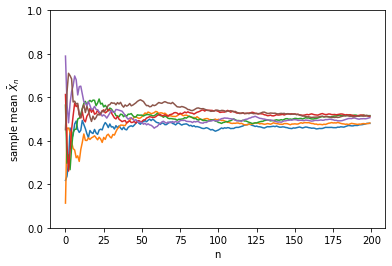

In [32]:
import numpy as np
import matplotlib.pylab as plt
rng = np.random.default_rng()
%matplotlib inline


length = 200
for _ in range(6):
    iid_sequence = rng.random(length)
    sample_mean = np.cumsum(iid_sequence) / [i+1 for i in range(length)]
    plt.plot(sample_mean)
    
plt.ylim(0,1)
plt.xlabel("n")
plt.ylabel(r"sample mean $\bar{X}_n$")
plt.show()

Clearly the sample mean $\bar{X}_n$ is still a random variable as its value varies from one sampling to another, but  as $n\to\infty$ it becomes less random and apparently converges to $\mathbb{E}[X]=1/2$. But what does it mean for a random variable to converge to a real number? We could look at the expectation value, but this is unsatisfactory because 
$$ \mathbb{E}[ \bar{X}_n ] = \frac{1}{n} \sum_{i=1}^n \mathbb{E}[ X_i ] = \frac{1}{n} \sum_{i=1}^n \mathbb{E}[ X ] = \mathbb{E}[X] $$
does not even depend on $n$. Perhaps it is better to look at the variance $\operatorname{Var}( \bar{X}_n )$. Using that the $X_i$ are all independent we may use the sum rule for the variance to get
$$ \operatorname{Var}( \bar{X}_n ) = \frac{1}{n^2}\operatorname{Var}( \sum_{i=1}^n X_i ) = \frac{1}{n^2} \sum_{i=1}^n \operatorname{Var}(X_i) = \frac{1}{n} \operatorname{Var}(X). $$
In particular we observe the fact, probably well-known to you, that the standard deviation of the sample mean decreases as $\sigma_{\bar{X}_n} = \sigma_X/\sqrt{n}$. 
We can combine this with the [Bienaymé–Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality) that holds for any random variable $Y$ with finite non-zero variance
$$ \mathbb{P}( |Y - \mathbb{E}[y]| \geq \epsilon ) \leq \frac{\sigma_Y^2}{\epsilon^{2}} \qquad\text{for }\epsilon > 0$$
to derive the **(weak) law of large numbers** for the sample mean
$$ \mathbb{P}( |\bar{X}_n - \mathbb{E}[X]| > \epsilon ) \leq \frac{\sigma_X^2}{n\epsilon^2} \qquad \text{for }\epsilon>0.$$
In other words, $\bar{X}_n$ is very likely to approximate $\mathbb{E}[X]$ to an accuracy $\epsilon$ if we take the sample size $n \gg \sigma_X^2 / \epsilon^2$.

### Central limit theorem

The law of large numbers tells us that the sample mean approximates the mean up to an error of order $1/\sqrt{n}$. We can be more precise and ask what is the distribution of the error in units of $\sigma_X/\sqrt{n}$ when $n$ becomes large,
$$ Z_n := \frac{\sqrt{n}}{\sigma_X} (\bar{X}_n - \mathbb{E}[X]). $$
In the case when $X$ is uniformly distributed on $(0,1)$ (with mean $\mathbb{E}[X] = 1/2$ and standard deviation $\sigma_X = 1/\sqrt{12}$) the distribution of $Z_n$ looks like this:

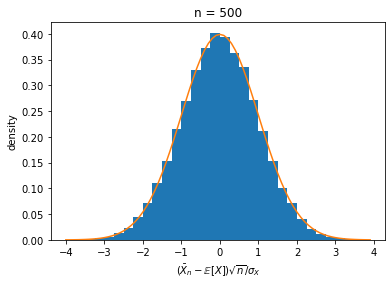

In [55]:
def gaussian(x):
    return np.exp(-x*x/2)/np.sqrt(2*np.pi)

length = 500
sample_means = np.array([np.mean(rng.random(length)) for _ in range(40000)])
# the mean of X is 0.5 and the standard deviation is 1/np.sqrt(12)
normalized_sample_means = (sample_means - 0.5) * np.sqrt(12*length)
plt.hist(normalized_sample_means,bins=np.arange(-4,4,0.25),density=True)
xrange = np.arange(-4,4,0.1)
plt.plot(xrange,gaussian(xrange))
plt.xlabel(r"$(\bar{X}_n-\mathbb{E}[X])\sqrt{n}/\sigma_X$")
plt.ylabel("density")
plt.title("n = {}".format(length))
plt.show()

The orange curve is the standard Gaussian, i.e. the probability density function of a **normal** random variable $\mathcal{N}$ of mean $0$ and standard deviation $1$,
$$ f_{\mathcal{N}}(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2 /2}.$$
To be precise the **central limit theorem (CLT)** states that the CDF of $Z_n$ converges to that of $\mathcal{N}$ as $n\to\infty$,
$$ \lim_{n\to\infty} F_{Z_n}(x) = F_{\mathcal{N}}(x) \qquad\text{for all }x\in\mathbb{R}.$$
Such a convergence of random variables is called **convergence in distribution**. 

It is instructive to see how the central limit theorem can be proved. To this end we introduce the **characteristic function** $\varphi_X(t)$ associated to any random variable $X$ as
$$ \varphi_X(t) = \mathbb{E}[ e^{itX}]\qquad \text{for }t\in\mathbb{R}. $$
Due to absolute convergence of the sum or integral appearing in the expectation value, it is a continuous function satisfying $|\varphi_X(t)| \leq 1$ and it completely characterizes the distribution of $X$. Set $\hat{X} = (X - \mathbb{E}(X)) / \sigma_X$ to be the normalized version of $X$, such that $\mathbb{E}[\hat{X}] = 0$ and $\operatorname{Var}(\hat{X}) = \mathbb{E}[\hat{X}^2]=1$ and $Z_n = \tfrac{1}{\sqrt{n}} \sum_{i=1}^n \hat{X}_i$. Then we can Taylor expand the characteristic function of $\hat{X}$ around $t=0$ to obtain
$$ \varphi_{\hat{X}}(t) = \mathbb{E}[ 1 + it \hat{X} - \tfrac{1}{2} t^2 \hat{X}^2 + \cdots] = 1 - \tfrac{1}{2} t^2 + \cdots.$$
On the other hand the characteristic function of $Z_n$ is
$$ \varphi_{Z_n}(t) = \mathbb{E}\Big[ \exp(it\tfrac{1}{\sqrt{n}}\sum_{i=1}^n \hat{X}_i)\Big] = \prod_{i=1}^n \mathbb{E}\Big[ \exp(it\tfrac{1}{\sqrt{n}}\hat{X}_i)\Big] = \varphi_{\hat{X}}(\tfrac{1}{\sqrt{n}}t)^{n}. $$
Plugging in the Taylor expansion gives
$$ \lim_{n\to\infty} \varphi_{Z_n}(t) = \lim_{n\to\infty} \left(1 - \tfrac{t^2}{2n} + \cdots\right)^{n} = e^{-t^2/2}.$$
But the right-hand side we recognize as the characteristic function $\varphi_{\mathcal{N}}(t)$ of the standard normal distribution. Convergence of characteristic functions can be shown to be equivalent to convergence in distribution and therefore this proves the central limit theorem.

Note that we have implicitly assumed finite variance $\operatorname{Var}(X) < \infty$ in the proof. In fact the central limit theorem does **not** hold when $\operatorname{Var}(X) = \infty$ and a variety of other limit distributions (called **stable distributions**) can arise in the large-$n$ limit. You will investigate this further in the exercises.